## Importing librairies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

# I. GET THE DATA

###  1. LOADING MY DATASET

Fichier ZIP récupéré sur le site UCI : http://archive.ics.uci.edu/ml/machine-learning-databases/00296/

In [2]:
df=pd.read_csv('1_original_diabetic_data.csv')

###  2. DATA DESCRIPTION

In [3]:
df.shape

(101766, 50)

In [4]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
encounter_id,2278392,149190,64410,500364,16680,35754,55842,63768,12522,15738
patient_nbr,8222157,55629189,86047875,82442376,42519267,82637451,84259809,114882984,48330783,63555939
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male,Male,Male,Male,Female,Female
age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100)
weight,?,?,?,?,?,?,?,?,?,?
admission_type_id,6,1,1,1,1,2,3,1,2,3
discharge_disposition_id,25,1,1,1,1,1,1,1,1,3
admission_source_id,1,7,7,7,7,2,2,7,4,4
time_in_hospital,1,3,2,2,1,3,4,5,13,12


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

# II. DATA CLEANING

## 1. COLUMNS

### encounter_id & patient_nbr

Unique identifier of an encounter / Unique identifier of a patient
Not bringing information for our model  --> I'm droping

In [6]:
df.drop(['encounter_id', 'patient_nbr'], axis=1, inplace=True)

### race

In [7]:
df.race.value_counts()

Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

I'm keeping 3 categories : Caucasian, AfricanAmerican and Other/missing

In [8]:
df['Caucasian']=0
df.loc[df.race=='Caucasian', 'Caucasian'] = 1

df['AfricanAmerican']=0
df.loc[df.race=='AfricanAmerican', 'AfricanAmerican'] = 1

df['Other_Race']=0
df.loc[df.race=='Asian', 'Other_Race'] = 1
df.loc[df.race=='Hispanic', 'Other_Race'] = 1
df.loc[df.race=='Other', 'Other_Race'] = 1
df.loc[df.race=='?', 'Other_Race'] = 1

df.drop('race', axis=1, inplace=True)

### gender

In [9]:
df.gender.value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

I'm droping rows where info is missing and I'm turning text in numbers --> 0: female / 1: male

In [10]:
df.drop(df[df.gender=='Unknown/Invalid'].index, inplace=True) 
df['gender']=df['gender'].map({'Female':0, 'Male':1})

### age

Turning the 10-year-intervals in numbers --> 0: less than 50 / 1: 50 or more

In [11]:
df['age']=df['age'].map({'[0-10)':0, '[10-20)':0, '[20-30)':0, '[30-40)':0, '[40-50)':0,
                         '[50-60)':1, '[60-70)':1, '[70-80)':1, '[80-90)':1, '[90-100)':1})

### weight

97% missing value --> I'm droping

In [12]:
df.drop('weight', axis=1, inplace=True)

### admission_type_id

Integer identifier corresponding to 9 distinct values(emergency, urgent, elective, newborn...)

In [13]:
df.admission_type_id.value_counts()

1    53988
3    18868
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: admission_type_id, dtype: int64

In [14]:
df['admission_type_id_1']=0
df['admission_type_id_2']=0
df['admission_type_id_3']=0
df['admission_type_id_other']=0

df.loc[df.admission_type_id==1, 'admission_type_id_1'] = 1
df.loc[df.admission_type_id==2, 'admission_type_id_2'] = 1
df.loc[df.admission_type_id==3, 'admission_type_id_3'] = 1

df.loc[df.admission_type_id==4, 'admission_type_id_other'] = 1
df.loc[df.admission_type_id==5, 'admission_type_id_other'] = 1
df.loc[df.admission_type_id==6, 'admission_type_id_other'] = 1
df.loc[df.admission_type_id==7, 'admission_type_id_other'] = 1
df.loc[df.admission_type_id==8, 'admission_type_id_other'] = 1

df.drop('admission_type_id', axis=1, inplace=True)

### discharge_disposition_id & admission_source_id  

In [15]:
print(df.discharge_disposition_id.unique())
print(df.admission_source_id.unique())

[25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27]
[ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13]


one integer per category, without knowing what are these categories --> I'm droping

In [16]:
df.drop(['discharge_disposition_id','admission_source_id'], axis=1, inplace=True)                                                          

### time_in_hospital

Integer number of days between admission and discharge

<AxesSubplot:>

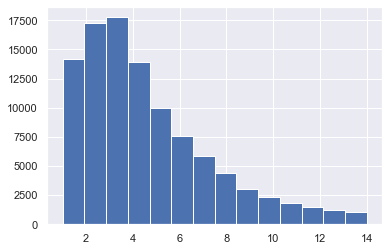

In [17]:
df.time_in_hospital.hist(bins=14)

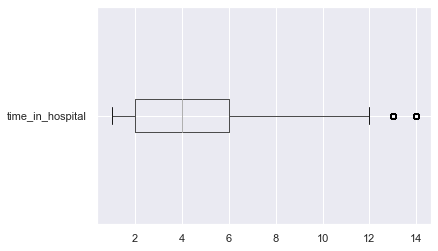

In [18]:
df.boxplot(column='time_in_hospital', vert=False)
plt.show()

### payer_code & medical_specialty

53% and 52% of missing values --> I'm dropping

In [19]:
df.drop(['medical_specialty', 'payer_code'], axis=1, inplace=True) 

### num_lab_procedures

Number of lab tests performed during the encounter

<AxesSubplot:>

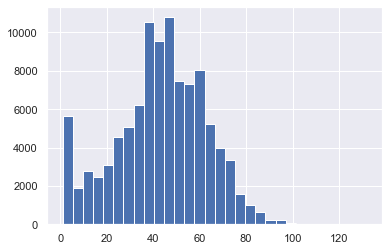

In [20]:
df.num_lab_procedures.hist(bins=30)

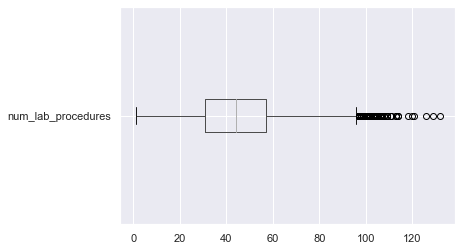

In [21]:
df.boxplot(column='num_lab_procedures', vert=False)
plt.show()

### num_procedures

Number of procedures (other than lab tests) performed during the encounter

<AxesSubplot:>

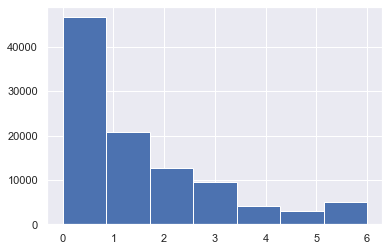

In [22]:
df.num_procedures.hist(bins=7)

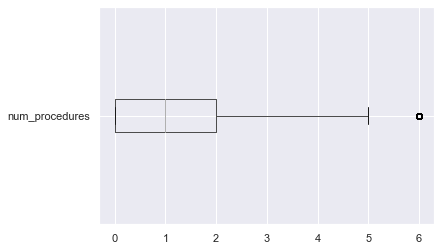

In [23]:
df.boxplot(column='num_procedures', vert=False)
plt.show()

### num_medications

Number of distinct generic names administered during the encounter

<AxesSubplot:>

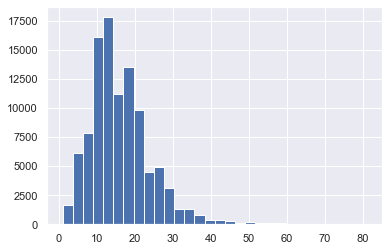

In [24]:
df.num_medications.hist(bins=30)

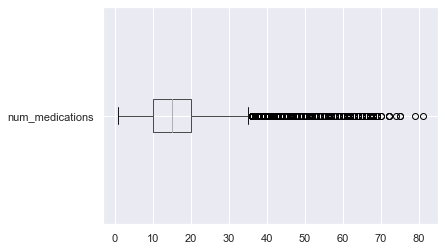

In [25]:
df.boxplot(column='num_medications', vert=False)
plt.show()

### number_outpatient, number_emergency  & number_inpatient  (TO MANAGE !!!)

Number of outpatient/emergency/inpatient visits of the patient in the year preceding the encounter

C:\Users\marie\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


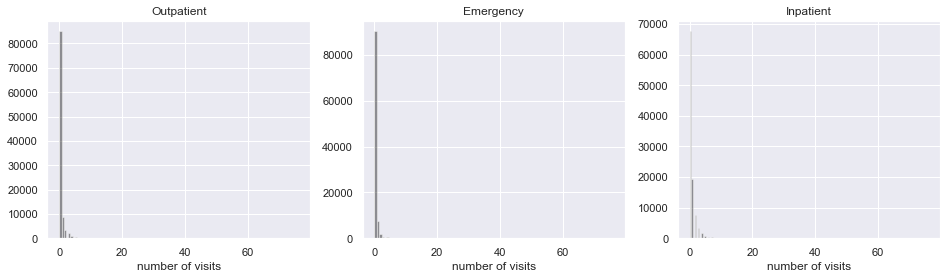

In [26]:
fig, ax=plt.subplots(1,3, figsize=(16, 4), sharex=True)
sns.distplot(df.number_outpatient, ax=ax[0], kde=False, bins=60, color='black')
sns.distplot(df.number_emergency, ax=ax[1], kde=False, bins=100, color='black')
sns.distplot(df.number_inpatient, ax=ax[2], kde=False, bins=40, color='black')
ax[0].set_xlabel('number of visits')
ax[1].set_xlabel('number of visits')
ax[2].set_xlabel('number of visits')
ax[0].set_title('Outpatient')
ax[1].set_title('Emergency')
ax[2].set_title('Inpatient')
plt.show()

In [27]:
print(df.number_outpatient.value_counts())

0     85024
1      8547
2      3594
3      2042
4      1099
5       533
6       303
7       155
8        98
9        83
10       57
11       42
13       31
12       30
14       28
15       20
16       15
17        8
21        7
20        7
22        5
18        5
19        3
24        3
27        3
23        2
25        2
26        2
29        2
33        2
35        2
36        2
40        1
28        1
34        1
37        1
38        1
39        1
42        1
Name: number_outpatient, dtype: int64


In [28]:
print(df.number_emergency.value_counts())

0     90380
1      7677
2      2042
3       725
4       374
5       192
6        94
7        73
8        50
10       34
9        33
11       23
13       12
12       10
22        6
18        5
16        5
19        4
20        4
14        3
15        3
21        2
25        2
76        1
54        1
24        1
28        1
29        1
37        1
42        1
46        1
64        1
63        1
Name: number_emergency, dtype: int64


In [29]:
print(df.number_inpatient.value_counts())

0     67627
1     19521
2      7566
3      3411
4      1622
5       812
6       480
7       268
8       151
9       111
10       61
11       49
12       34
13       20
14       10
15        9
16        6
19        2
17        1
18        1
21        1
Name: number_inpatient, dtype: int64


### diag_1, diag_2 & diag_3

The primary, secondary, and additionnal secondary diagnosis (coded as first 3 digits of ICD9): 848, 923 & 954 distinct values

At the end, everybody has diabete  --> I'm dropping

In [30]:
df.drop(['diag_1', 'diag_2', 'diag_3'], axis=1, inplace=True)

### number_diagnoses

Number of diagnoses entered to the system

<AxesSubplot:>

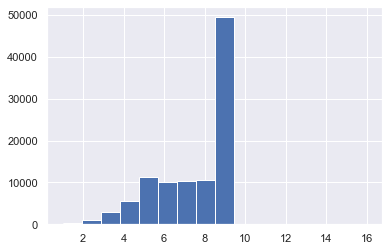

In [31]:
df.number_diagnoses.hist(bins=16)

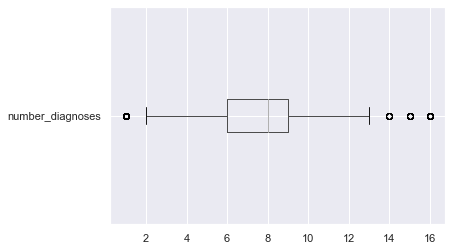

In [32]:
df.boxplot(column='number_diagnoses', vert=False)
plt.show()

### max_glu_serum

Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured
--> Turned on numbers : 0: none or normal / 1:too high

In [33]:
df['max_glu_serum']=df['max_glu_serum'].map({'None':0, 'Norm':0, '>200':1, '>300':1})

### A1Cresult

Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.
--> Turned on numbers : 0: none or normal / 1:too high

In [34]:
df['A1Cresult']=df['A1Cresult'].map({'None':0, 'Norm':0, '>7':1, '>8':1})

### Meds columns

the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed

#####  examide & citoglipton

In [35]:
print(df.examide.value_counts())
print(df.citoglipton.value_counts())

No    101763
Name: examide, dtype: int64
No    101763
Name: citoglipton, dtype: int64


No patients took this drugs --> I'm dropping those columns

In [36]:
df.drop(['examide','citoglipton'], axis=1, inplace=True)

##### acetohexamide, tolbutamide, troglitazone, glimepiride-pioglitazone, metformin-rosiglitazone & metformin-pioglitazone

too few patients have been prescribed these drugs, these treatments are not representative --> I'm dropping them

In [37]:
df.drop(df[df.acetohexamide=='Steady'].index, inplace=True)                 # drop 1 row
df.drop(df[df.tolbutamide=='Steady'].index, inplace=True)                   # drop 23 rows
df.drop(df[df.troglitazone=='Steady'].index, inplace=True)                  # drop 3 row
df.drop(df[df['glimepiride-pioglitazone']=='Steady'].index, inplace=True)   # drop 1 row
df.drop(df[df['metformin-rosiglitazone']=='Steady'].index, inplace=True)    # drop 2 rows
df.drop(df[df['metformin-pioglitazone']=='Steady'].index, inplace=True)     # drop 1 rows   

In [38]:
df.drop(['acetohexamide', 'tolbutamide', 'troglitazone', 'glimepiride-pioglitazone',\
         'metformin-rosiglitazone', 'metformin-pioglitazone'], axis=1, inplace=True)

##### metformin repaglinide, nateglinide, chlorpropamide, glimepiride, glipizide, glyburide, pioglitazone, rosiglitazone, acarbose, miglitol, tolazamide, insulin, glyburide-metformin & glipizide-metformin

--> turning values in numbers

In [39]:
dct={'No':0, 'Down':1, 'Steady':1, 'Up':1}

df['metformin']=df['metformin'].map(dct)
df['repaglinide']=df['repaglinide'].map(dct)
df['nateglinide']=df['nateglinide'].map(dct)
df['chlorpropamide']=df['chlorpropamide'].map(dct)
df['glimepiride']=df['glimepiride'].map(dct)
df['glipizide']=df['glipizide'].map(dct)
df['glyburide']=df['glyburide'].map(dct)
df['pioglitazone']=df['pioglitazone'].map(dct)
df['rosiglitazone']=df['rosiglitazone'].map(dct)
df['acarbose']=df['acarbose'].map(dct)
df['miglitol']=df['miglitol'].map(dct)
df['tolazamide']=df['tolazamide'].map(dct)
df['insulin']=df['insulin'].map(dct)
df['glyburide-metformin']=df['glyburide-metformin'].map(dct)
df['glipizide-metformin']=df['glipizide-metformin'].map(dct)

### change

Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”

--> Turned on numbers 0: no change / 1: change

In [40]:
df['change']=df['change'].map({'No':0, 'Ch':1})

### diabetesMed

Indicates if there was any diabetic medication prescribed. Values: “yes” and “no”  --> Turned on numbers

In [41]:
df['diabetesMed']=df['diabetesMed'].map({'No':0, 'Yes':1})

### readmitted

Days to inpatient readmission. Values: “<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission.
--> Turned on numbers : 0: no readmittance / 1: readmittance

In [42]:
df['readmitted']=df['readmitted'].map({'NO':0, '>30':1, '<30':1 })
df.readmitted.value_counts()

0    54842
1    46890
Name: readmitted, dtype: int64

We can see the values are quite balanced

# III. LOOK WHAT OUR CLEANED DATA LOOKS LIKE

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101732 entries, 0 to 101765
Data columns (total 37 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   gender                   101732 non-null  int64
 1   age                      101732 non-null  int64
 2   time_in_hospital         101732 non-null  int64
 3   num_lab_procedures       101732 non-null  int64
 4   num_procedures           101732 non-null  int64
 5   num_medications          101732 non-null  int64
 6   number_outpatient        101732 non-null  int64
 7   number_emergency         101732 non-null  int64
 8   number_inpatient         101732 non-null  int64
 9   number_diagnoses         101732 non-null  int64
 10  max_glu_serum            101732 non-null  int64
 11  A1Cresult                101732 non-null  int64
 12  metformin                101732 non-null  int64
 13  repaglinide              101732 non-null  int64
 14  nateglinide              101732 non-

In [44]:
df.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
gender,0,0,0,1,1,1,1,1,0,0,0,1,0,1,0,1,1,0,1,1
age,0,0,0,0,0,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1
time_in_hospital,1,3,2,2,1,3,4,5,13,12,9,7,7,10,1,12,4,3,5,6
num_lab_procedures,41,59,11,44,51,31,70,73,68,33,47,62,60,55,49,75,45,29,35,42
num_procedures,0,0,5,1,0,6,1,0,2,3,2,0,0,1,5,5,4,0,5,2
num_medications,1,18,13,16,8,16,21,12,28,18,17,11,15,31,2,13,17,11,23,23
number_outpatient,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
number_emergency,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
number_inpatient,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
number_diagnoses,1,9,6,7,5,9,7,8,8,8,9,7,8,8,8,9,8,3,9,8


# Check the correlations

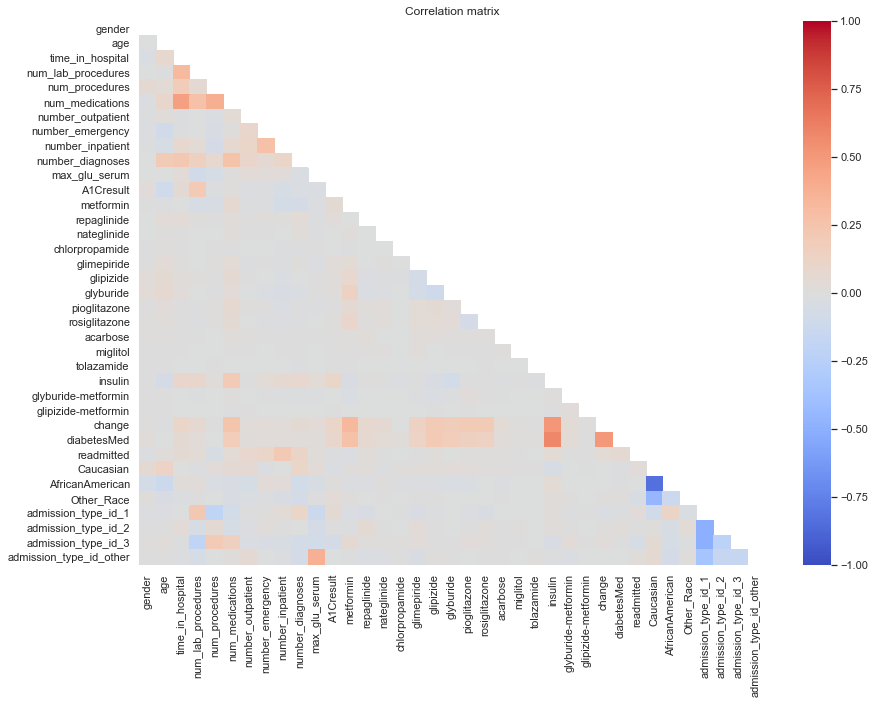

In [45]:
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(14,10))
    sns.heatmap(ax=ax, data=df.corr(), mask=mask, center=0, vmin=-1, vmax=1, cmap="coolwarm")
plt.title('Correlation matrix')
plt.show()

In [46]:
df.to_csv('3_cleaned_diabetic_data.csv', index=False)